In [129]:
import os, sys
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize, stats

import utils

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [130]:
np.set_printoptions(precision=6)

In [131]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
data = np.loadtxt(os.path.join('Data', 'ex2data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

In [133]:
X.shape, y.shape

((100, 2), (100,))

In [134]:
df = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y': y})
df.head()

,x1,x2,y
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0


In [135]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [136]:
df['y'].value_counts()

y
1.0    60
0.0    40
Name: count, dtype: int64

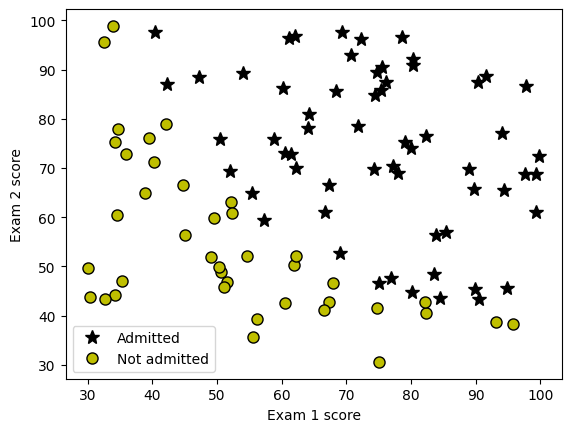

In [137]:
# plot the data
fig = pyplot.figure()


pos = y == 1
neg = y == 0

pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

# add axes labels
pyplot.xlabel('Exam 1 score')
pyplot.ylabel('Exam 2 score')
pyplot.legend(['Admitted', 'Not admitted'])

plt.show()

In [138]:
# define the sigmoid function

def sigmoid(Z: np.array) -> np.array:
    g = 1. / (1. + np.exp(-Z))
    
    return g

In [139]:
Z = stats.uniform.rvs(1, 2, size=(1, 10))

In [140]:
sigmoid(Z)

array([[0.915371, 0.933248, 0.734729, 0.84437 , 0.940275, 0.861565,
        0.934468, 0.906404, 0.731699, 0.731296]])

In [141]:

def get_scaled_feature(X: np.array):
    m = np.mean(X, axis=0)
    s = np.std(X, axis=0)
    
    return (X - m) / s

In [142]:
X = get_scaled_feature(X=X)
X.shape

(100, 2)

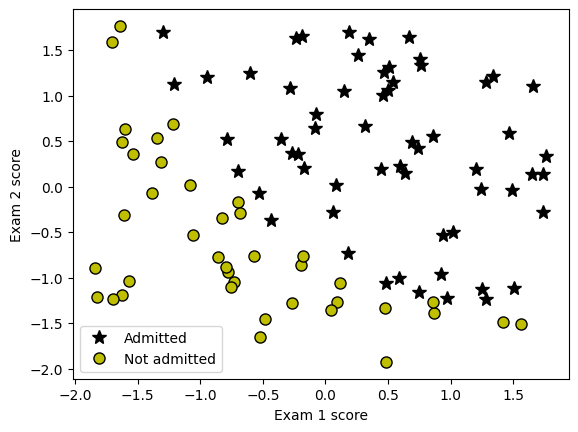

In [143]:
# plot the data
fig = pyplot.figure()


pos = y == 1
neg = y == 0

pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

# add axes labels
pyplot.xlabel('Exam 1 score')
pyplot.ylabel('Exam 2 score')
pyplot.legend(['Admitted', 'Not admitted'])

plt.show()

In [144]:
# let's define the cost function

def cost_fn(theta: np.array, X_train: np.array, y_train: np.array, m: int):
    # let's calculate the hypothesis fn i.e h(X)
    h = sigmoid(np.dot(theta.T, X_train))
    
    first_term = np.sum(y_train * np.log(h))
    second_term = np.sum((1 - y_train) * np.log(1 - h))
    
    cost = (-1./m) * (first_term + second_term)
    
    return cost

# let's define the gradient function

def gradient_fn(theta: np.array, X_train: np.array, y_train: np.array, m: int):
    # let's calculate the hypothesis fn i.e h(X)
    h = sigmoid(np.dot(theta.T, X_train))
    
    diff = (h - y_train)
    
    gradient = (1./m) * np.dot(X_train, diff.T)
    
    return gradient

In [145]:
X.shape

(100, 2)

In [146]:
X = np.hstack((np.ones(X.shape[0]).reshape(-1, 1), X)).T
X.shape

(3, 100)

In [147]:
y = y.reshape(-1, 1).T
y.shape

(1, 100)

In [178]:

def train(X_train, y_train, n_iterations: int=10000, lr: float=0.00001):
    # Initialize theta
    theta = stats.uniform.rvs(-1, 1, size=(X_train.shape[0], 1))
    #theta = np.zeros((X_train.shape[0], 1))
    
    # to plot the cost over the iteration
    costs = []
    
    for i in range(n_iterations):
        cost = cost_fn(theta=theta, X_train=X_train, y_train=y_train, m=X_train.shape[1])
        costs.append(cost)
        
        if (i % 10) == 0:
            print(f"The cost at {i}th iteration is {cost}")
            print(f"Theta: {theta.T}")
            print("************************************************\n")
        
        gradient = gradient_fn(theta=theta, X_train=X_train, y_train=y_train, m=X_train.shape[1])
        
        # update the theta 
        theta = theta - (lr * gradient)
    
    return theta, np.array(costs)

In [185]:
n_iterations = 50000

opt_theta, costs = train(X_train=X, y_train=y, 
                        n_iterations=n_iterations,
                        lr=0.001)

The cost at 0th iteration is 1.3490165477354241
Theta: [[-0.343094 -0.963858 -0.719596]]
************************************************

The cost at 10th iteration is 1.3450078215175512
Theta: [[-0.341432 -0.959145 -0.715708]]
************************************************

The cost at 20th iteration is 1.3410091280968692
Theta: [[-0.339773 -0.954438 -0.711825]]
************************************************

The cost at 30th iteration is 1.3370204968663089
Theta: [[-0.338116 -0.949737 -0.707947]]
************************************************

The cost at 40th iteration is 1.3330419570221803
Theta: [[-0.33646  -0.945042 -0.704073]]
************************************************

The cost at 50th iteration is 1.3290735375599918
Theta: [[-0.334806 -0.940353 -0.700205]]
************************************************

The cost at 60th iteration is 1.3251152672702546
Theta: [[-0.333154 -0.93567  -0.696341]]
************************************************

The cost at 70th iter

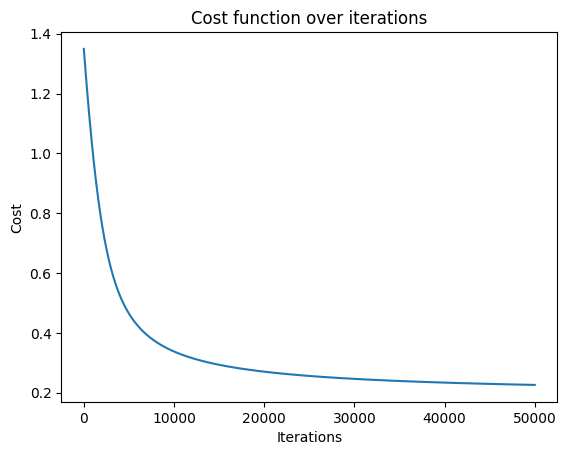

In [186]:
# Plot the cost over iterations
plt.plot(range(n_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

In [187]:
sigmoid(np.dot(opt_theta.T, X)) < 0.5

array([[ True,  True,  True, False, False,  True, False,  True, False,
        False, False,  True, False, False,  True, False,  True,  True,
        False, False,  True, False,  True,  True, False, False, False,
        False,  True,  True, False, False,  True,  True,  True,  True,
        False, False,  True,  True, False,  True, False, False,  True,
         True, False, False, False, False, False, False, False,  True,
         True,  True, False, False, False, False, False,  True,  True,
         True,  True,  True, False,  True, False, False,  True, False,
        False, False, False, False, False, False,  True, False, False,
        False, False,  True, False, False,  True, False, False,  True,
        False, False,  True, False, False, False, False, False,  True,
        False]])

In [188]:
X.shape

(3, 100)

In [189]:
opt_theta

array([[0.984701],
       [2.450367],
       [2.23871 ]])

##### Decision Boundary Plot

In [197]:
# to plot the decision boundary
X_ = X.T[:, 1:]

In [200]:
X_.shape

(100, 2)

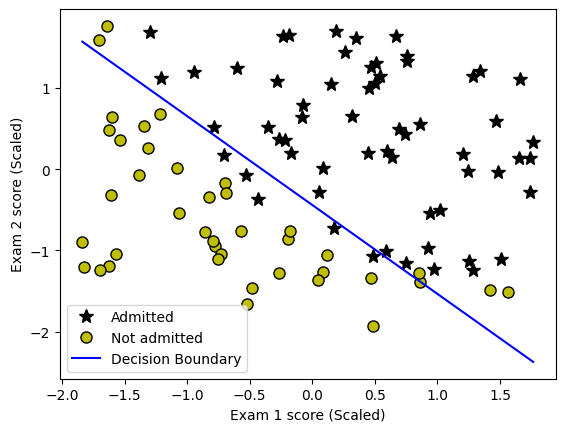

In [208]:
# Extract theta values
theta_0 = opt_theta[0, 0]  # Intercept
theta_1 = opt_theta[1, 0]  # Coefficient for Exam 1
theta_2 = opt_theta[2, 0]  # Coefficient for Exam 2

# Define a range for x1 (Exam 1 scores)
x1_vals = np.linspace(X[1, :].min(), X[1, :].max(), 100)

# Compute the corresponding x2 values using the decision boundary formula
x2_vals = -(theta_0 + theta_1 * x1_vals) / theta_2

# Create the plot
fig = plt.figure()

# Identify positive and negative examples (use boolean indexing)
pos = y == 1
neg = y == 0

pos = pos.reshape(X_.shape[0], )
neg = neg.reshape(X_.shape[0], )

pyplot.plot(X_[pos, 0], X_[pos, 1], 'k*', lw=2, ms=10)
pyplot.plot(X_[neg, 0], X_[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

# Plot the decision boundary
plt.plot(x1_vals, x2_vals, 'b-', label='Decision Boundary')

# Add labels and legend
plt.xlabel('Exam 1 score (Scaled)')
plt.ylabel('Exam 2 score (Scaled)')
plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])

# Show the plot
plt.show()


##### Using Sklearn

In [163]:
from sklearn.linear_model import LogisticRegression

In [190]:
# Initialize the Logistic Regression model
model = LogisticRegression()

In [109]:
# X.T[:, 1:]

In [191]:
# Train the model (assuming you've already trained the model with .fit())
model.fit(X.T[:, 1:], y.T)

# Get the coefficients (weights) for each feature
coefficients = model.coef_

# Get the intercept (bias term or theta_0)
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [[2.28487  2.091616]]
Intercept: [1.002523]


In [192]:
model1 = LogisticRegression(solver='saga', max_iter=1000)

# Train the model (assuming you've already trained the model with .fit())
model1.fit(X.T[:, 1:], y.T)

# Get the coefficients (weights) for each feature
coefficients = model1.coef_

# Get the intercept (bias term or theta_0)
intercept = model1.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[2.284953 2.091727]]
Intercept: [1.002549]
